Predicted Values

In [1]:
from src import *

2017-02-08 start test to 2018-02-07
2016-02-09 start test to 2017-02-08

In [2]:
with open('src/processed_data.pkl', 'rb') as f:
    op, high, low, close, volume, returns, risk_free_rate = pickle.load(f)

train_returns = returns.iloc[:-252]
test_returns = returns.iloc[-252:]
test_risk_free_rate = risk_free_rate.iloc[-252:]
cv_returns = train_returns.iloc[-252:]
cv_returns

Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2016-02-09,0.016247,0.017843,0.000353,-0.000211,0.011093,0.013423,-0.012356,-0.018579,-0.014652,0.003047,...,0.001151,-0.003383,-0.013396,-0.003678,-0.032569,0.013438,-0.014339,-0.001414,0.002410,-0.008245
2016-02-10,0.013480,0.025373,-0.020924,-0.007609,-0.014313,0.009980,0.005660,0.009492,0.022494,-0.007123,...,-0.030080,-0.007440,-0.009158,0.012901,0.013606,-0.007657,0.004353,0.010930,-0.001445,-0.013386
2016-02-11,-0.014611,-0.017118,-0.001155,-0.006065,-0.010296,-0.012342,-0.023658,-0.008314,-0.007842,-0.002454,...,-0.015838,0.008075,0.003146,-0.021359,-0.021629,-0.006057,-0.023031,-0.013327,-0.041344,0.000762
2016-02-12,0.024879,0.035800,0.016907,0.003090,0.007637,0.012459,0.021506,0.013502,0.022823,0.016247,...,0.040726,0.008430,0.017805,-0.032006,0.009164,0.022663,0.031682,0.001090,0.053326,0.026822
2016-02-16,0.023466,0.020673,0.036479,0.027804,0.017533,0.000000,0.022898,0.023069,0.028417,0.047792,...,0.002022,0.008984,0.002342,0.017568,0.028108,-0.001080,0.031860,0.019850,0.032344,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-01,0.005905,-0.004530,-0.022474,0.059194,-0.003607,0.015123,0.013318,-0.005813,-0.000176,0.016280,...,0.009536,-0.014015,-0.011389,0.003521,0.020001,-0.003250,-0.010123,0.001520,0.006379,0.006893
2017-02-02,-0.007335,-0.000908,0.010838,-0.001710,0.000000,-0.006340,0.009873,0.003791,-0.001766,-0.012418,...,0.026280,0.012984,0.006130,-0.006701,0.014045,-0.007147,0.012257,-0.007538,-0.016384,0.006846
2017-02-03,0.009768,0.004308,0.002522,0.004270,-0.003620,0.013873,0.000702,0.007452,0.017607,0.003847,...,-0.007475,0.001375,0.001078,0.010910,-0.002793,0.009179,0.008491,0.004411,0.036205,0.003942


Predicting the returns

In [39]:
predictor = MLReturnPredictor(model_type='ridge', alpha=.1)
X_train, y_train = predictor.create_training_dataset(os.listdir('src/data')[:os.listdir('src/data').index('2017-02-08.pkl')-65],
                                                      train_returns.iloc[:-65]) #65 for purge
predictor.train(X_train, y_train)
predicted = predictor.predict_all_test_returns(os.listdir('src/data')[os.listdir('src/data').index('2017-02-08.pkl'):])

Creating training dataset from 871 files...
✓ Dataset created: X=(409370, 54), y=(409370,)
Training ridge model...
✓ Training R²: 0.0058
  Prediction spread: 0.1243%
Predicting returns for 252 dates...
✓ Predictions complete: (252, 470)


This is during the test period then to do walk forward can use this code

In [40]:
predicted

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2017-02-08,-0.000390,-0.001618,0.000662,-0.001462,0.000373,0.001351,-0.000780,-0.000524,-0.000800,-0.000079,...,-0.001333,-0.000099,-0.000591,0.000310,-0.000764,-0.000208,-0.000356,0.001275,-0.000807,-0.000294
2017-02-09,-0.000197,0.000991,0.000889,-0.000116,-0.000378,-0.000683,0.000027,-0.000461,-0.001655,-0.000867,...,-0.000586,-0.001567,0.000286,-0.000521,-0.000250,-0.000371,-0.001081,0.000637,-0.000071,-0.001163
2017-02-10,-0.000048,-0.000398,0.000755,-0.000778,-0.001503,-0.000424,-0.000549,-0.000705,-0.001107,-0.000671,...,-0.000396,-0.001382,-0.000049,-0.001909,-0.000945,-0.000486,-0.000742,0.000067,-0.000754,-0.000485
2017-02-13,-0.001695,-0.000573,0.000626,-0.000466,-0.000805,-0.001178,-0.001170,-0.000369,-0.000501,0.000039,...,-0.000790,0.000013,-0.000150,-0.001154,-0.000363,-0.000361,-0.000425,-0.001475,0.000208,-0.000213
2017-02-14,-0.001262,-0.001309,0.000133,-0.001998,-0.000188,-0.000385,-0.001146,-0.000791,-0.001396,-0.001711,...,-0.001264,-0.000505,0.000214,-0.000594,-0.002279,-0.001509,-0.000679,-0.001039,-0.001539,-0.000193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,0.000385,-0.001943,0.001398,0.000309,-0.001634,0.001516,0.000157,-0.000335,-0.000451,0.000243,...,-0.001900,0.000248,0.000593,0.000820,-0.001524,-0.000580,-0.000385,0.000241,-0.001452,0.000342
2018-02-02,-0.000035,-0.002433,0.000784,-0.000214,-0.001086,-0.000406,-0.000359,-0.000107,-0.000836,-0.001709,...,-0.000971,-0.001281,-0.000613,-0.000189,-0.001534,-0.000577,-0.000137,-0.001712,-0.001081,-0.000084
2018-02-05,0.000347,-0.001034,0.001992,0.000223,0.001706,0.001207,0.000791,0.000508,-0.000513,-0.000836,...,-0.001235,0.000350,-0.000134,-0.000318,0.000524,-0.000506,0.000358,0.000048,0.000556,0.000505
2018-02-06,0.001290,0.002724,0.002789,0.002234,0.001110,0.002456,0.000470,0.001558,0.001642,0.000649,...,0.000335,0.001978,0.001291,0.002035,0.002459,0.000763,0.002119,0.000938,0.001330,0.001569


In [57]:
predicted

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2017-02-13,0.030582,0.066424,0.048609,0.012377,0.019858,0.039710,0.022418,0.023034,0.018261,0.030926,...,0.014512,0.022902,0.022460,0.024458,0.045862,0.030045,0.013660,0.024988,0.052998,0.015473
2017-02-27,0.028452,0.046697,0.026194,0.009707,0.017217,0.024840,0.015773,0.019459,0.017733,0.035286,...,0.011721,0.029692,0.021152,0.020033,0.044293,0.019109,0.016757,0.019782,0.041721,0.017176
2017-03-06,0.023168,0.038721,0.023194,0.013592,0.014045,0.020073,0.017123,0.017508,0.015159,0.023935,...,0.016555,0.022134,0.017531,0.021932,0.049746,0.024730,0.012989,0.017719,0.041372,0.016356
2017-03-13,0.030757,0.059136,0.026400,0.016243,0.016059,0.030597,0.017593,0.019476,0.016200,0.025562,...,0.020766,0.025767,0.023118,0.032565,0.052074,0.035056,0.017032,0.020662,0.042244,0.019401
2017-03-20,0.032810,0.075906,0.023289,0.015059,0.019391,0.032972,0.021593,0.019560,0.013252,0.024789,...,0.021081,0.024247,0.020397,0.026237,0.047687,0.033566,0.014621,0.021902,0.041185,0.019997
2017-03-27,0.034068,0.082297,0.019061,0.021085,0.021922,0.038625,0.021200,0.021970,0.017769,0.027513,...,0.022929,0.022425,0.020323,0.024822,0.063130,0.038546,0.019102,0.023607,0.062947,0.023555
2017-04-03,0.032355,0.069878,0.022558,0.021362,0.019917,0.036327,0.018464,0.023981,0.013782,0.027538,...,0.020588,0.019585,0.025227,0.023256,0.062249,0.034269,0.016432,0.021765,0.036044,0.021317
2017-04-10,0.029451,0.068009,0.025179,0.022854,0.016602,0.028731,0.018018,0.025772,0.014563,0.030012,...,0.023713,0.024676,0.018355,0.025416,0.029284,0.039521,0.017025,0.020624,0.039788,0.021026
2017-04-17,0.026257,0.051638,0.026942,0.025715,0.022505,0.030241,0.017967,0.031728,0.015440,0.037708,...,0.026651,0.027382,0.022275,0.024286,0.028213,0.042221,0.017159,0.015407,0.042152,0.020837
2017-04-24,0.020673,0.056065,0.024252,0.019930,0.016987,0.032291,0.019356,0.025765,0.017327,0.032530,...,0.024323,0.024454,0.019327,0.020013,0.022664,0.037169,0.016160,0.021995,0.046385,0.018014


In [3]:
# testing_dates = test_returns.index.strftime('%Y-%m-%d').map(lambda x: x+".pkl").values

with open('src/data_weekly_var/weekly_volatility_targets.pkl', 'rb') as f:
    weekly_volatility_targets = pickle.load(f)

test_weekly_var = weekly_volatility_targets.loc['2017-02-08':]

testing_dates = test_weekly_var.index.strftime('%Y-%m-%d').map(lambda x: x+".pkl").values

preds = []

for test_date in testing_dates:
    predictor = MLReturnPredictor(model_type='ridge', alpha=.1)
    X_train, y_train = predictor.create_training_dataset(os.listdir('src/data_weekly_var')[:os.listdir('src/data_weekly_var').index(test_date)-10],
                                                        np.log(weekly_volatility_targets)) #65 for purge
    predictor.train(X_train, y_train)
    predicted = predictor.predict_all_test_returns([test_date])
    preds.append(predicted)

predicted = pd.concat(preds)
predicted = np.exp(predicted)


Creating training dataset from 166 files...
✓ Dataset created: X=(78020, 54), y=(78020,)
Training ridge model...
✓ Training R²: 0.2754
  Prediction spread: 58.7913%
Predicting returns for 1 dates...
✓ Predictions complete: (1, 470)
Creating training dataset from 167 files...
✓ Dataset created: X=(78490, 54), y=(78490,)
Training ridge model...
✓ Training R²: 0.2751
  Prediction spread: 58.7490%
Predicting returns for 1 dates...
✓ Predictions complete: (1, 470)
Creating training dataset from 168 files...
✓ Dataset created: X=(78960, 54), y=(78960,)
Training ridge model...
✓ Training R²: 0.2742
  Prediction spread: 58.6275%
Predicting returns for 1 dates...
✓ Predictions complete: (1, 470)
Creating training dataset from 169 files...
✓ Dataset created: X=(79430, 54), y=(79430,)
Training ridge model...
✓ Training R²: 0.2736
  Prediction spread: 58.5480%
Predicting returns for 1 dates...
✓ Predictions complete: (1, 470)
Creating training dataset from 170 files...
✓ Dataset created: X=(79900,

Generate weights for variance

In [4]:
opt = PortfolioOptimizer(returns.loc[:"2017-02-13"].iloc[:-1]).minimum_variance_from_cov(predicted.loc[["2017-02-13"]], max_position=0.05)
print(opt)

[7.63598304e-19 1.55122783e-19 3.07743812e-19 1.10677355e-02
 1.59091245e-19 2.90748350e-02 6.27273117e-19 0.00000000e+00
 3.71782893e-19 2.98531111e-19 1.33363108e-20 0.00000000e+00
 1.80052664e-19 0.00000000e+00 2.11069917e-19 0.00000000e+00
 3.01057317e-19 2.87523676e-19 0.00000000e+00 6.37730763e-20
 3.43659575e-19 0.00000000e+00 0.00000000e+00 1.36806409e-18
 0.00000000e+00 2.35111279e-19 1.74116965e-20 0.00000000e+00
 0.00000000e+00 5.34627537e-21 5.31569667e-20 1.19297748e-19
 3.92148902e-19 0.00000000e+00 2.38326144e-19 0.00000000e+00
 0.00000000e+00 1.00404619e-19 0.00000000e+00 1.60253970e-19
 0.00000000e+00 0.00000000e+00 2.22762832e-19 7.87353751e-20
 0.00000000e+00 0.00000000e+00 1.34908283e-19 0.00000000e+00
 0.00000000e+00 1.07077402e-19 5.20400708e-03 1.44543537e-19
 7.09662298e-20 1.79438896e-02 4.41309443e-19 2.03798616e-19
 1.60261763e-02 0.00000000e+00 1.33817076e-22 1.12294172e-02
 1.20077595e-19 0.00000000e+00 4.31851343e-05 0.00000000e+00
 0.00000000e+00 0.000000

In [5]:
from joblib import Parallel, delayed
from tqdm.auto import tqdm
import pickle

tickers = predicted.columns.tolist()

def compute_weights_for_date(date):
    opt = PortfolioOptimizer(returns.loc[:date].iloc[:-1]).minimum_variance_from_cov(predicted.loc[[date]], max_position=0.05)
    return pd.Series(opt, index=tickers)

weights_list = Parallel(n_jobs=-1)(
    delayed(compute_weights_for_date)(d) for d in tqdm(predicted.index[:5], desc="weights")
)

weights = pd.concat(weights_list, axis=1).T
weights.index.name = 'date'
weights.index = predicted.index[:5]

with open('weights_variance.pkl', 'wb') as f:
    pickle.dump(weights, f)

c:\Users\Josiah Lee\Documents\GitHub\dse4212_portfolio_optimisation\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
weights: 100%|██████████| 5/5 [00:00<00:00, 293.20it/s]


The one below takes very long btw

Chooses optimal portfolio based on predicted returns

In [ ]:
from joblib import Parallel, delayed
from tqdm.auto import tqdm
import pickle

tickers = predicted.columns.tolist()

def compute_weights_for_date(date):
    predicted_returns = pd.concat([returns.loc[:date].iloc[:-1], predicted.loc[[date]]])
    opt = PortfolioOptimizer(predicted_returns).minimum_variance(max_position=0.05)
    return pd.Series(opt, index=tickers)

weights_list = Parallel(n_jobs=-1)(
    delayed(compute_weights_for_date)(d) for d in tqdm(predicted.index[:5], desc="weights")
)

weights = pd.concat(weights_list, axis=1).T
weights.index.name = 'date'
weights.index = predicted.index[:5]

with open('weights.pkl', 'wb') as f:
    pickle.dump(weights, f)


weights: 100%|██████████| 5/5 [00:00<00:00, 3983.19it/s]


In [22]:
spy_weights = volume.shift(1)/volume.sum(axis=0)
spy_weights = spy_weights.loc["2017-02-08":"2018-02-07"]
spy_weights

Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2017-02-08,0.000737,0.000518,0.000878,0.000561,0.000425,0.000835,0.000992,0.000777,0.000435,0.000692,...,0.000706,0.000316,0.000750,0.001004,0.000936,0.001236,0.000370,0.000490,0.000528,0.000518
2017-02-09,0.000716,0.000366,0.001416,0.000338,0.000541,0.000582,0.000768,0.000726,0.000687,0.001101,...,0.000444,0.000353,0.000897,0.000867,0.001480,0.001080,0.000613,0.000619,0.000530,0.000623
2017-02-10,0.000869,0.000600,0.000812,0.000417,0.000436,0.000646,0.000586,0.000648,0.000447,0.000710,...,0.000513,0.000390,0.000615,0.001480,0.000712,0.001078,0.000739,0.000614,0.000609,0.000573
2017-02-13,0.000711,0.000342,0.000542,0.000295,0.000580,0.000605,0.000421,0.000668,0.000692,0.000541,...,0.000427,0.001310,0.000560,0.000789,0.000595,0.000946,0.000790,0.000478,0.000745,0.001329
2017-02-14,0.000533,0.000521,0.000727,0.000339,0.000645,0.001203,0.000647,0.000608,0.000506,0.000855,...,0.000486,0.001003,0.000581,0.000887,0.000891,0.001078,0.001091,0.000404,0.000666,0.001216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,0.000691,0.000504,0.000910,0.000477,0.001589,0.000974,0.000890,0.000575,0.000728,0.001122,...,0.000948,0.000730,0.000923,0.001266,0.006003,0.001100,0.000528,0.001187,0.000680,0.000892
2018-02-02,0.000682,0.000306,0.000560,0.000694,0.001003,0.001104,0.000924,0.000518,0.000627,0.000749,...,0.001102,0.001022,0.001151,0.000913,0.002725,0.001220,0.000417,0.001075,0.001073,0.000643
2018-02-05,0.000664,0.000432,0.000805,0.001273,0.000725,0.000657,0.001408,0.000668,0.000745,0.000947,...,0.003268,0.000763,0.001910,0.000907,0.001178,0.001458,0.000782,0.000853,0.001374,0.000560


Preparing backtest


In [10]:
backtester = WalkForwardBacktest(
    train_returns=train_returns,
    test_returns=test_returns,
    # test_prices=test_prices,
    rf_rate_test=test_risk_free_rate,
    rebalance_freq='D'  # Weekly
)

running backtest

In [23]:
results = {}

with open('weights.pkl', 'rb') as f:
    weights = pickle.load(f)

# Run Equal Weight
results['ML w fees'] = backtester.run_backtest_preloaded_weights(
    strategy_name='ML',
    preloaded_weights=weights,
    transaction_cost_bps=3.0
)

results['ML no fees'] = backtester.run_backtest_preloaded_weights(
    strategy_name='ML',
    preloaded_weights=weights,
    transaction_cost_bps=0
)


weights = weights.iloc[[0]]

for col in weights.columns:
    weights[col].values[:] = 1/470

results['Base'] = backtester.run_backtest_preloaded_weights(
    strategy_name='ML',
    preloaded_weights=weights,
    transaction_cost_bps=0
)

results['SPY'] = backtester.run_backtest_preloaded_weights(
    strategy_name='SPY',
    preloaded_weights=spy_weights,
    transaction_cost_bps=0
)


Running backtest: ML
Rebalancing frequency: D
Preloaded weights shape: (252, 470)
Backtest complete. Final value: $1.1058

Running backtest: ML
Rebalancing frequency: D
Preloaded weights shape: (252, 470)
Backtest complete. Final value: $1.1106

Running backtest: ML
Rebalancing frequency: D
Preloaded weights shape: (1, 470)
Backtest complete. Final value: $1.1142

Running backtest: SPY
Rebalancing frequency: D
Preloaded weights shape: (252, 470)
Backtest complete. Final value: $1.0324


Evaluation


Performance Comparison:
           Total Return Annualized Return Annualized Volatility Sharpe Ratio Sortino Ratio Maximum Drawdown Calmar Ratio Win Rate Avg Turnover per Rebalance Total Turnover
ML w fees        10.58%            10.58%                 6.91%        1.274         1.098           -6.66%        1.589   58.17%                      5.80%          14.56
ML no fees       11.06%            11.06%                 6.91%        1.337         1.149           -6.65%        1.664   58.17%                      5.80%          14.56
Base             11.42%            11.42%                 8.55%        1.162         1.033           -7.80%        1.464   55.78%                      0.00%           0.00
SPY               3.24%             3.24%                 3.49%        0.597         0.533           -3.64%        0.891   53.39%                     64.82%         162.69

5. Generating Visualizations
------------------------------------------------------------


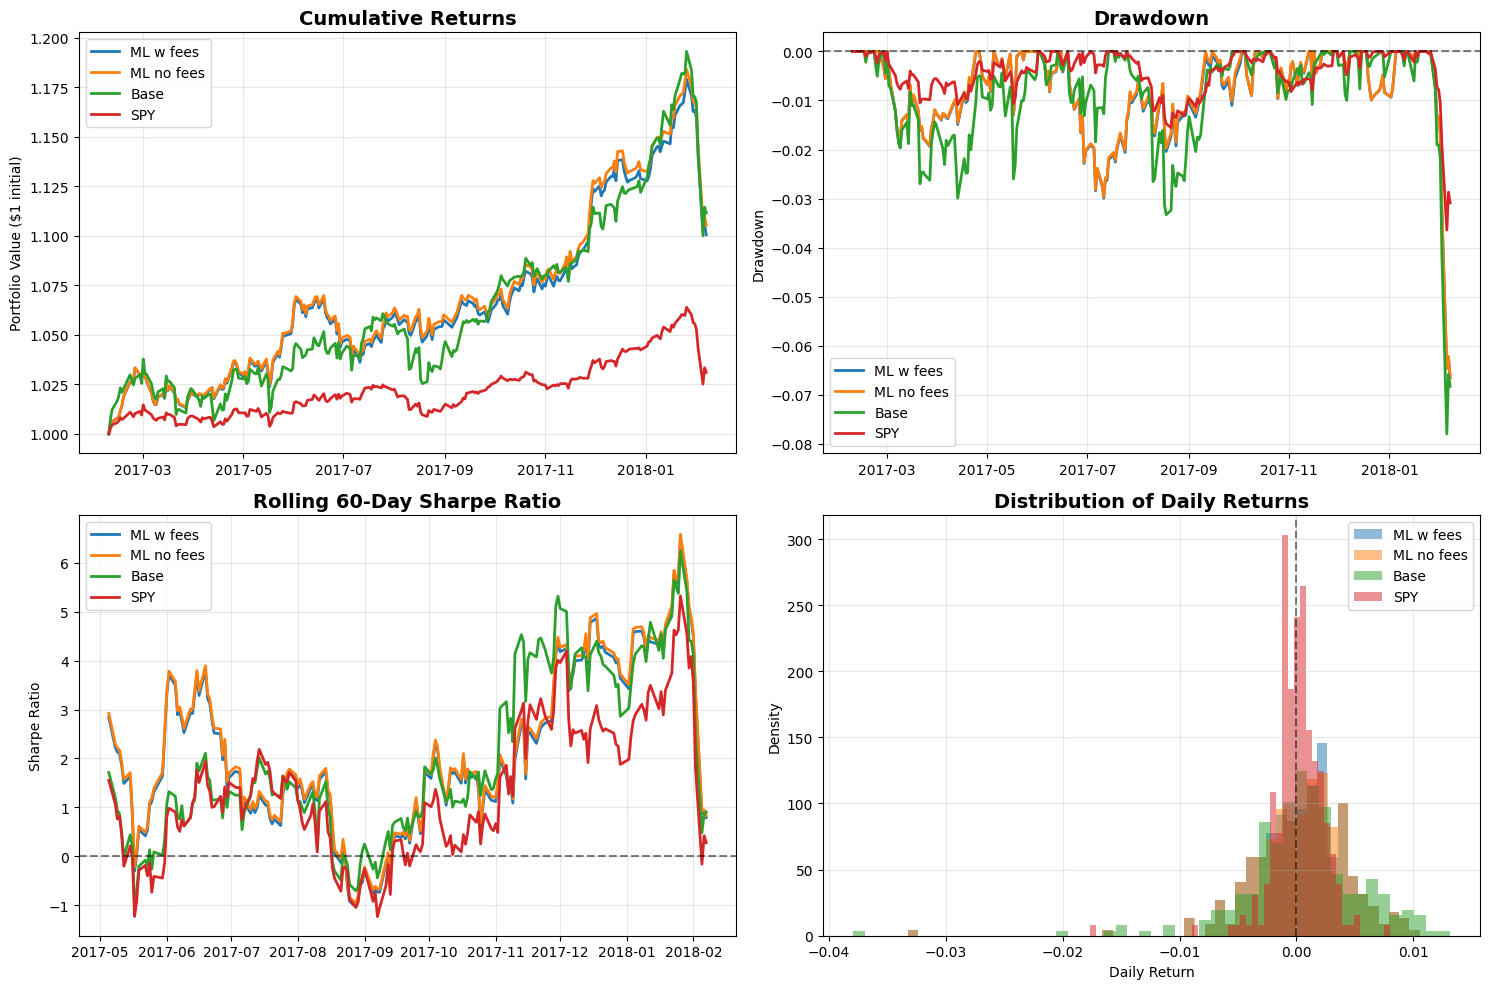

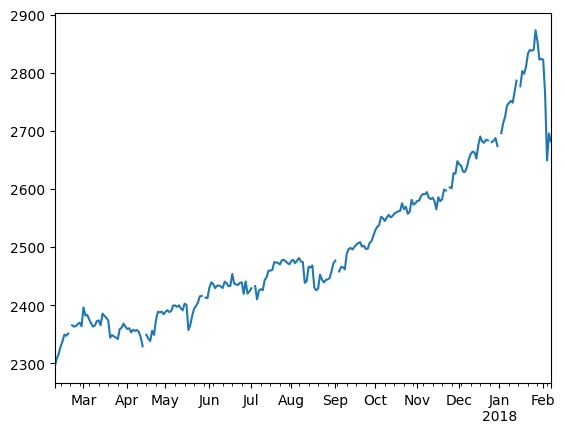

In [24]:
evaluator = PerformanceEvaluator(test_risk_free_rate)

comparison_df = evaluator.compare_strategies(results)
print("\nPerformance Comparison:")
print(comparison_df.to_string())

# ============================================================
# STEP 5: Visualize Results
# ============================================================
print("\n5. Generating Visualizations")
print("-" * 60)

fig = evaluator.plot_results(results, figsize=(15, 10))
plt.show()

fred = Fred(api_key = os.getenv("API_KEY"))
spy = fred.get_series_latest_release('SP500').loc["2017-02-08":"2018-02-07"]
spy.plot()
plt.show()
